In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random lat and lng combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add lats and lngs to list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create cities list
cities = []

# Identify nearest city for each lat and lng combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, add to cities list
    if city not in cities:
        cities.append(city)
        
# Print city count to confirm sufficient count
len(cities)

630

In [6]:
# Pseudocode
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
### Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
### City, country, and date
### Latitude and longitude
### Maximum temperature
### Humidity
### Cloudiness
### Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import requests library
import requests

# Import API key
from config import weather_api_key

# Import time library and datetime module from the datetime library 
import time
from datetime import datetime

# Starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?" + "&APPID=" + weather_api_key

In [8]:
# Create empty list to hold weather data
city_data = []

# Print the beginning of the log
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count =1

# Loop through cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to record count
    record_count += 1
    
    try:
        # Parse JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | arriana
Processing Record 5 of Set 1 | lagos
Processing Record 6 of Set 1 | rutana
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | oyugis
Processing Record 10 of Set 1 | teya
Processing Record 11 of Set 1 | gorno-chuyskiy
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | yar-sale
Processing Record 14 of Set 1 | tibiri
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | faya
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | boende
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | ribeira grande
Processing Record 23 of Set 1 | s

Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | baiyin
Processing Record 43 of Set 4 | ahipara
Processing Record 44 of Set 4 | margate
Processing Record 45 of Set 4 | port hardy
Processing Record 46 of Set 4 | castro
Processing Record 47 of Set 4 | caravelas
Processing Record 48 of Set 4 | najran
Processing Record 49 of Set 4 | airai
Processing Record 50 of Set 4 | ziyamet
City not found. Skipping...
Processing Record 1 of Set 5 | ritchie
Processing Record 2 of Set 5 | portland
Processing Record 3 of Set 5 | nouadhibou
Processing Record 4 of Set 5 | gavle
Processing Record 5 of Set 5 | gnjilane
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | avarua
Processing Record 8 of Set 5 | nakusp
Processing Record 9 of Set 5 | lasa
Processing Record 10 of Set 5 | calategas
City not found. Skipping...
Processing Record 11 of Set 5 | ponta do sol
Processing Record 12 of Set 5 | los palacios
Processing Record 13 of Set 5 | s

Processing Record 29 of Set 8 | dinar
Processing Record 30 of Set 8 | bud
Processing Record 31 of Set 8 | axim
Processing Record 32 of Set 8 | lamar
Processing Record 33 of Set 8 | dudinka
Processing Record 34 of Set 8 | abu jubayhah
City not found. Skipping...
Processing Record 35 of Set 8 | arlit
Processing Record 36 of Set 8 | raga
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | dharchula
Processing Record 39 of Set 8 | mrirt
City not found. Skipping...
Processing Record 40 of Set 8 | leningradskiy
Processing Record 41 of Set 8 | coos bay
Processing Record 42 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 8 | ulkan
Processing Record 44 of Set 8 | asyut
Processing Record 45 of Set 8 | burica
City not found. Skipping...
Processing Record 46 of Set 8 | zeya
Processing Record 47 of Set 8 | beliu
Processing Record 48 of Set 8 | kinna
Processing Record 49 of Set 8 | verkhnevilyuysk
Processing Record 50 of Set 8 | kamenka
Processi

Processing Record 16 of Set 12 | honiara
Processing Record 17 of Set 12 | waddan
Processing Record 18 of Set 12 | culpeper
Processing Record 19 of Set 12 | vardo
Processing Record 20 of Set 12 | aanekoski
Processing Record 21 of Set 12 | qitaihe
Processing Record 22 of Set 12 | gunnaur
Processing Record 23 of Set 12 | sembakung
Processing Record 24 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 25 of Set 12 | surt
Processing Record 26 of Set 12 | chauk
Processing Record 27 of Set 12 | ginir
Processing Record 28 of Set 12 | pangkalanbuun
Processing Record 29 of Set 12 | aykhal
Processing Record 30 of Set 12 | fare
Processing Record 31 of Set 12 | duz
City not found. Skipping...
Processing Record 32 of Set 12 | lastoursville
Processing Record 33 of Set 12 | bara
Processing Record 34 of Set 12 | abu samrah
Processing Record 35 of Set 12 | lampazos de naranjo
Processing Record 36 of Set 12 | kununurra
Processing Record 37 of Set 12 | cabra
Processing Record 38 of Set 1

In [9]:
# Convert the array of dictionaries to DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,294.15,58,4,1.67,ZA,2022-05-01 09:38:46
1,Jamestown,42.0970,-79.2353,283.92,34,0,4.12,US,2022-05-01 09:38:47
2,Klaksvik,62.2266,-6.5890,281.66,81,89,5.18,FO,2022-05-01 09:38:48
3,Arriana,41.0833,25.7000,293.07,52,60,5.47,GR,2022-05-01 09:38:50
4,Lagos,6.5833,3.7500,304.33,57,85,2.39,NG,2022-05-01 09:38:51
5,Rutana,-3.8667,30.1000,293.66,68,57,2.40,BI,2022-05-01 09:38:52
6,Esperance,-33.8667,121.9000,292.06,67,0,2.25,AU,2022-05-01 09:38:53
7,Kapaa,22.0752,-159.3190,296.14,92,20,8.23,US,2022-05-01 09:38:54
8,Oyugis,-0.5090,34.7358,297.26,70,32,1.96,KE,2022-05-01 09:38:56
9,Teya,60.3778,92.6267,275.50,67,100,3.09,RU,2022-05-01 09:38:57


In [10]:
# Re-order columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-05-01 09:38:46,-34.4187,19.2345,294.15,58,4,1.67
1,Jamestown,US,2022-05-01 09:38:47,42.0970,-79.2353,283.92,34,0,4.12
2,Klaksvik,FO,2022-05-01 09:38:48,62.2266,-6.5890,281.66,81,89,5.18
3,Arriana,GR,2022-05-01 09:38:50,41.0833,25.7000,293.07,52,60,5.47
4,Lagos,NG,2022-05-01 09:38:51,6.5833,3.7500,304.33,57,85,2.39


In [11]:
# Create output CSV
output_data_file = "Weather Data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

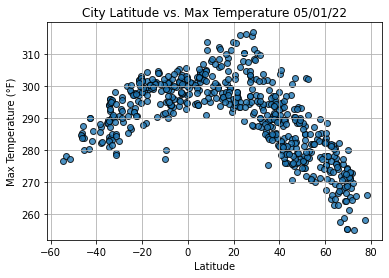

In [15]:
# Import time module
import time

# Build scatter plot for lat vs. max temp
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Data/Fig1.png")

# Show plot
plt.show()

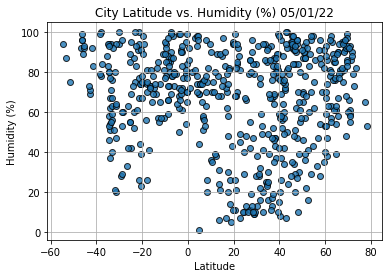

In [16]:
# Build scatter plot for lat vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Data/Fig2.png")

# Show plot.
plt.show()

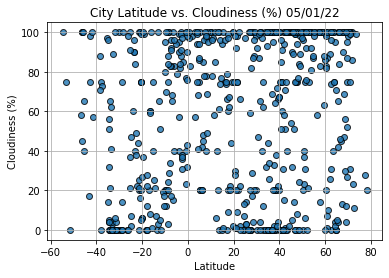

In [17]:
# Build scatter plot for lat vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Data/Fig3.png")

# Show plot.
plt.show()

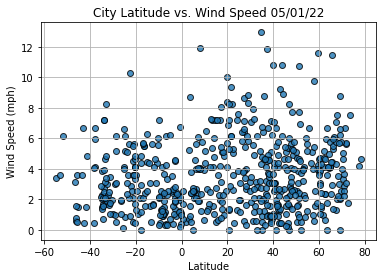

In [18]:
# Build scatter plots for lat vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather Data/Fig4.png")

# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on weather data
# and plot a regression line and equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and plot regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Jamestown,US,2022-05-01 09:38:47,42.0970,-79.2353,283.92,34,0,4.12
2,Klaksvik,FO,2022-05-01 09:38:48,62.2266,-6.5890,281.66,81,89,5.18
3,Arriana,GR,2022-05-01 09:38:50,41.0833,25.7000,293.07,52,60,5.47
4,Lagos,NG,2022-05-01 09:38:51,6.5833,3.7500,304.33,57,85,2.39
7,Kapaa,US,2022-05-01 09:38:54,22.0752,-159.3190,296.14,92,20,8.23


In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [35]:
# Linear regression for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature",
                       "Max Temp",xy=(20,40))

TypeError: plot_linear_regression() got an unexpected keyword argument 'xy'